In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Ścieżka do pliku CSV
file_path = r'/experiments/autoencoder_hyperparameter_tuning_live.csv'

# Wczytanie danych do DataFrame
df = pd.read_csv(file_path)

# Wyświetlenie kilku pierwszych wierszy
print(df.head())


   hidden_size  latent_size  learning_rate  batch_size  test_loss  \
0          128           32         0.0010          32   0.001149   
1          128           32         0.0010          64   0.001726   
2          128           32         0.0005          32   0.001342   
3          128           32         0.0005          64   0.002030   
4          128           32         0.0001          32   0.004871   

                                        epoch_losses  
0  [0.36336344480514526, 0.22953640669584274, 0.1...  
1  [0.3964388171831767, 0.3536879817644755, 0.291...  
2  [0.37997787694136304, 0.3235589563846588, 0.24...  
3  [0.39017990231513977, 0.36780237158139545, 0.3...  
4  [0.3913290649652481, 0.3837498724460602, 0.375...  


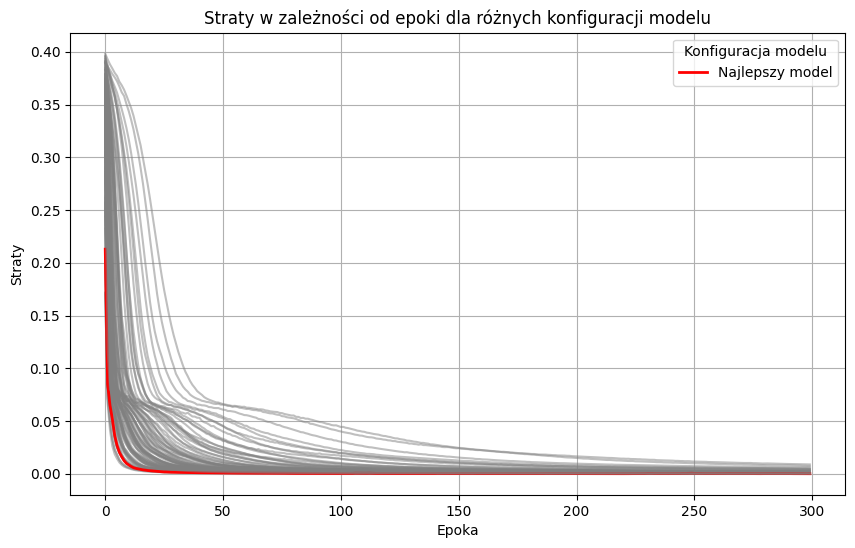

In [3]:
plt.figure(figsize=(10, 6))

# Iteracja przez wiersze w DataFrame
for index, row in df.iterrows():
    epoch_losses = eval(row['epoch_losses'])
    
    # Sprawdzenie, czy to najlepsza konfiguracja
    if row['hidden_size'] == 2048 and row['latent_size'] == 128 and row['learning_rate'] == 0.0005 and row['batch_size'] == 32:
        plt.plot(range(len(epoch_losses)), epoch_losses, label='Najlepszy model', color='red', linewidth=2)
    else:
        plt.plot(range(len(epoch_losses)), epoch_losses, color='gray', alpha=0.5)

plt.xlabel('Epoka')
plt.ylabel('Straty')
plt.title('Straty w zależności od epoki dla różnych konfiguracji modelu')
plt.legend(title='Konfiguracja modelu', loc='upper right')
plt.grid()
plt.show()


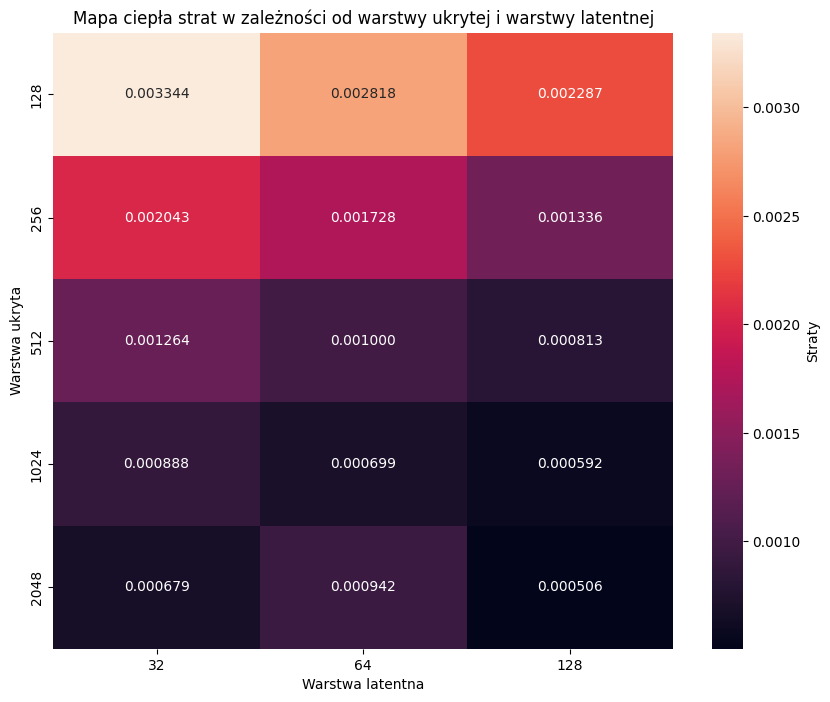

In [12]:
import seaborn as sns

# Przygotowanie danych
heatmap_data = df.pivot_table(values='test_loss', index='hidden_size', columns='latent_size')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".6f", cbar_kws={'label': 'Straty'})
plt.title('Mapa ciepła strat w zależności od warstwy ukrytej i warstwy latentnej')
plt.xlabel('Warstwa latentna')
plt.ylabel('Warstwa ukryta')
plt.show()


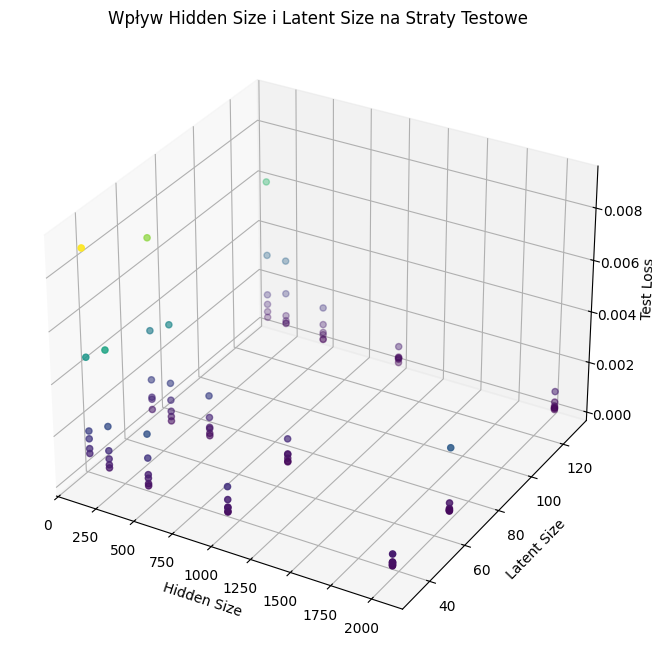

In [15]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Dane do wykresu
x = df['hidden_size']
y = df['latent_size']
z = df['test_loss']

# Wykres 3D
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel('Hidden Size')
ax.set_ylabel('Latent Size')
ax.set_zlabel('Test Loss')
ax.set_title('Wpływ Hidden Size i Latent Size na Straty Testowe')

plt.show()


C:\Users\barrt\AppData\Local\Temp\ipykernel_24628\1161322597.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


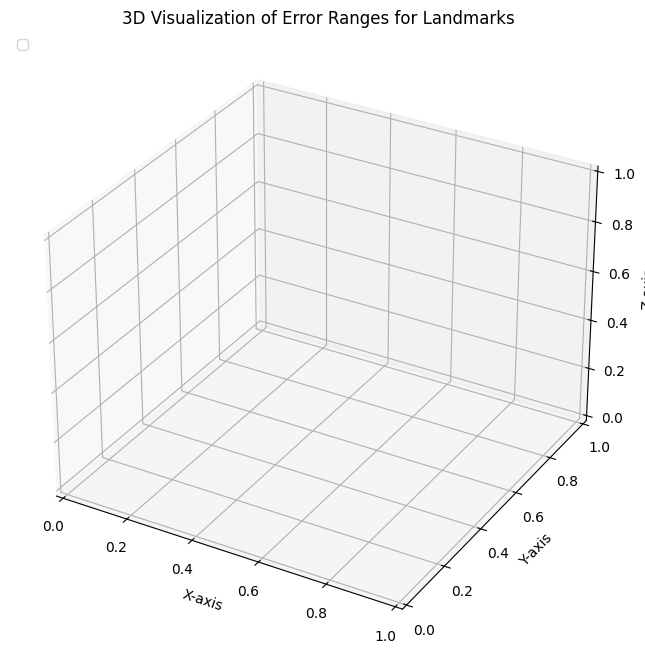

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the landmarks data from the file
landmarks_data_path = r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\landmarks_data.npy'
landmarks_data = np.load(landmarks_data_path, allow_pickle=True)

# Extract a sample record (e.g., the first record)
landmarks = landmarks_data[0]  # Replace index if needed

# Display the shape and structure of the sample record


# Load the thresholds from the JSON file
with open(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\angle_thresholds.json', 'r') as file:
    thresholds = json.load(file)

# Generate 3D coordinates for landmarks (for demonstration purposes)
# Replace with actual landmark data if available


# Extract errors for each joint group
error_ranges = []
for exercise, joints in thresholds.items():
    for joint_group, threshold in joints.items():
        joints_list = joint_group.split('-')
        for joint in joints_list:
            if joint in landmarks:
                error_ranges.append((joint, landmarks[joint], threshold))

# Function to draw a sphere at a given position
def plot_sphere(ax, center, radius, color='b', alpha=0.3):
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color=color, alpha=alpha, edgecolor='k')

# Plot 3D landmarks with error spheres
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot landmarks and error spheres
for joint, coords, threshold in error_ranges:
    ax.scatter(*coords, color='r', label=joint, s=50)  # Plot landmark
    plot_sphere(ax, coords, radius=threshold, color='b', alpha=0.1)  # Plot error sphere

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Error Ranges for Landmarks')
plt.legend(loc='upper left')
plt.show()
